In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_fcn():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
fcn = build_fcn()
fcn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn = build_cnn()
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
fcn_history = fcn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
fcn_training_time = time.time() - start_time

start_time = time.time()
cnn_history = cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
cnn_training_time = time.time() - start_time

fcn_test_loss, fcn_test_acc = fcn.evaluate(X_test, y_test, verbose=0)

cnn_test_loss, cnn_test_acc = cnn.evaluate(X_test_cnn, y_test, verbose=0)

print("Fully Connected Network (FCN):")
print(f"Number of parameters: {fcn.count_params()}")
print(f"Training time: {fcn_training_time:.2f} seconds")
print(f"Test accuracy: {fcn_test_acc:.4f}")

print("\nConvolutional Neural Network (CNN):")
print(f"Number of parameters: {cnn.count_params()}")
print(f"Training time: {cnn_training_time:.2f} seconds")
print(f"Test accuracy: {cnn_test_acc:.4f}")

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7483 - loss: 0.7259 - val_accuracy: 0.8438 - val_loss: 0.4328
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8533 - loss: 0.4055 - val_accuracy: 0.8577 - val_loss: 0.3779
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8736 - loss: 0.3463 - val_accuracy: 0.8743 - val_loss: 0.3473
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8818 - loss: 0.3203 - val_accuracy: 0.8712 - val_loss: 0.3552
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8900 - loss: 0.2986 - val_accuracy: 0.8757 - val_loss: 0.3467
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8917 - loss: 0.2903 - val_accuracy: 0.8828 - val_loss: 0.3277
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9001 - loss: 0.2706 - val_accuracy: 0.8879 - val_loss: 0.3186
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9035 - loss: 0.2581 - val_accuracy: 0.

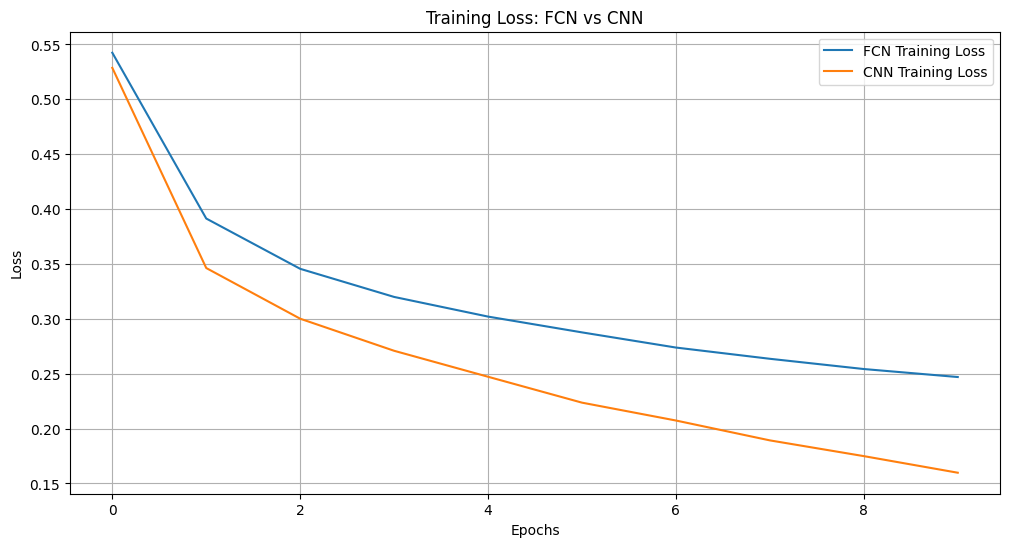

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(fcn_history.history['loss'], label='FCN Training Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss: FCN vs CNN')
plt.legend()
plt.grid()
plt.show()